In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pertpy as pt

/home/icb/raphael.kfuri-rubens/miniforge-pypy3/envs/yumm-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
adata = sc.read_h5ad("/home/icb/raphael.kfuri-rubens/data/yumm_analysis/anndata_files/immunity_dc_revision_annotation_v6.h5ad")
adata

AnnData object with n_obs × n_vars = 33673 × 23676
    obs: 'library_id', 'sample_id', 'genotype', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_counts', 'log1p_n_counts', 'log1p_n_genes', 'percent_hb', 'n_counts_hb', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_top50', 'cell_passed_qc', 'consensus_fraction', 'qc_cluster', 'cluster_passed_qc', 'consensus_passed_qc', 'cell_passed_qc_int', 'cluster_passed_qc_int', 'consensus_passed_qc_int', 'leiden_res_0.05', 'leiden_res_0.10', 'leiden_res_0.50', 'leiden_res_1.00', 'leiden_res_2.00', 'annotation_v1_subannot', 'annotation_DC_fine', 'myeloid_fine', 'DC_fine', 'annotation_T_NK_fine', 'annotation_v2', 'annotation_MacMono_fine', 'annotation_v3', 'annotation_v4', 'annotation_b_sep', 'annotation_v5', 'annotation_v6'
    var: 'ensembl_ids', 'gene_symbols', 'n_cells', 'hb', 'mito', 'ribo', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_int

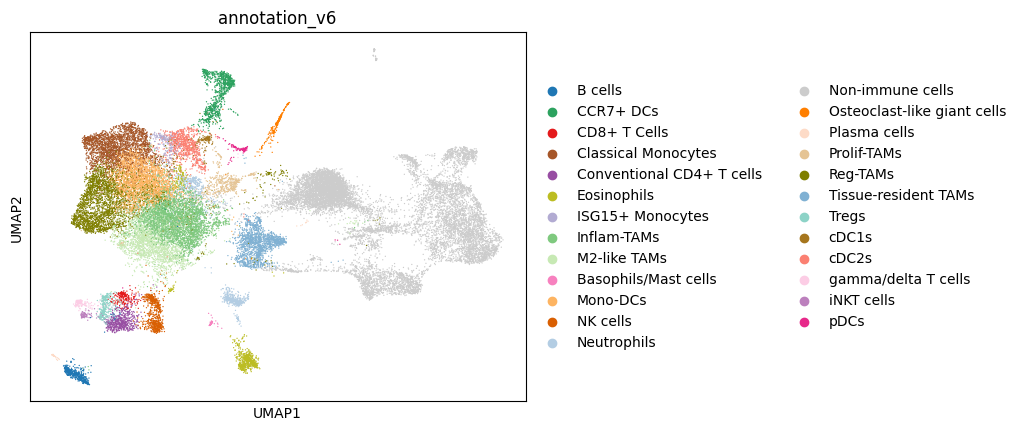

In [21]:
sc.pl.umap(adata, color="annotation_v6")

In [22]:
adata.uns["title"] = "DC3 - Ctrl. vs KO"
adata.uns["default_embedding"] = "X_umap"

In [7]:
adata.obs["annotation_v6"].value_counts(dropna=False)

annotation_v6
Non-immune cells               11771
Inflam-TAMs                     3374
Reg-TAMs                        2744
Mono-DCs                        2508
Classical Monocytes             2284
M2-like TAMs                    2058
Tissue-resident TAMs            1674
CCR7+ DCs                        946
cDC2s                            862
Neutrophils                      827
Eosinophils                      771
NK cells                         670
Conventional CD4+ T cells        540
Prolif-TAMs                      532
B cells                          486
Tregs                            316
Osteoclast-like giant cells      246
CD8+ T Cells                     220
ISG15+ Monocytes                 214
cDC1s                            171
gamma/delta T cells              151
pDCs                             115
iNKT cells                        98
Basophils/Mast cells              48
Plasma cells                      47
Name: count, dtype: int64

In [23]:
cell_types_map = {
    "YUMM cells/CAFs": "CL:0000057",
    "Monocytes": "CL:0000576",
    "Non-classical Monocytes": "CL:0000576",
    "Mix": "CL:0000000",
    "Reg-TAMs": "CL:0000235",
    "Prolif-TAMs": "CL:0000235",
    "Angio-TAMs": "CL:0000235",
    "moDCs": "CL:0011031",
    "Mac/Mono (Cluster T/NK,0)": "CL:0000000",
    "NK cells": "CL:0000623",
    "cDC2s": "CL:0000990",
    "M2-like TAMs": "CL:0000235",
    "CCR7+ DCs": "CL:0000451",
    "CCR7+ DCs (cDC2-like)": "CL:0000451",
    "B cells": "CL:0000236",
    "Neutrophils": "CL:0000775",
    "Conventional CD4+ T cells": "CL:0000624",
    "Tregs": "CL:0000815",
    "CD8+ T Cells": "CL:0000625",
    "pDCs": "CL:0000784",
    "cDC1s": "CL:0000990",
    "YUMM1.7": "CL:0001064",
    "Osteoclast-like giant cells": "CL:0000092",
    "ANGIO-TAMs": "CL:0000235",
    "Basophils/Mast cells": "CL:0000097",
    "Basophils": "CL:0000767",
    "IFN-TAMs": "CL:0000235",
    "Classical Monocytes": "CL:0000576",
    "Classical Monocytes-2": "CL:0000576",
    "Classical Monocytes-3": "CL:0000576",
    "Fibroblast-plasma cell-macrophage mixed cluster": "CL:0000786",
    "CD4+ T cells with myeloid contamination": "CL:0000624",
    "gamma/delta T cells": "CL:0000798",
    "iNKT cells": "CL:0000921",
    "Plasma cells": "CL:0000786",
    "Non-immune cells": "CL:0000000",
    "ISG15+ Monocytes": "CL:0000576",
    "Inflam-TAMs": "CL:0000235",
    "Tissue-resident TAMs": "CL:0000235",
    "Mono-DCs": "CL:0011031",
    "Eosinophils": "CL:0000771"
}

adata.obs["cell_type_ontology_term_id"] = adata.obs["annotation_v6"].map(cell_types_map)
adata.obs["cell_type_ontology_term_id"].value_counts(dropna=False)

cell_type_ontology_term_id
CL:0000000    11771
CL:0000235    10382
CL:0011031     2508
CL:0000576     2498
CL:0000990     1033
CL:0000451      946
CL:0000775      827
CL:0000771      771
CL:0000623      670
CL:0000624      540
CL:0000236      486
CL:0000815      316
CL:0000092      246
CL:0000625      220
CL:0000798      151
CL:0000784      115
CL:0000921       98
CL:0000097       48
CL:0000786       47
Name: count, dtype: int64

In [24]:
adata.obs["cell_type"] = adata.obs["annotation_v6"]

In [25]:
adata.obs = adata.obs.loc[:, ~adata.obs.columns.str.startswith("leiden")]
adata.obs

,library_id,sample_id,genotype,n_genes,doublet_score,predicted_doublet,n_counts,log1p_n_counts,log1p_n_genes,percent_hb,...,annotation_T_NK_fine,annotation_v2,annotation_MacMono_fine,annotation_v3,annotation_v4,annotation_b_sep,annotation_v5,annotation_v6,cell_type_ontology_term_id,cell_type
AAACCCTGTAGCCCGT-1,L1,S2,Control,3152,0.011382,False,8776.0,9.079890,8.056110,0.000000,...,NaN,YUMM cells/CAFs,NaN,YUMM cells/CAFs,YUMM cells/CAFs,NaN,YUMM cells/CAFs,Non-immune cells,CL:0000000,Non-immune cells
AAACCCTGTCAGTAGA-1,L1,S2,Control,1669,0.042963,False,2819.0,7.944492,7.420579,0.035474,...,NaN,YUMM cells/CAFs,NaN,YUMM cells/CAFs,YUMM cells/CAFs,NaN,YUMM cells/CAFs,Non-immune cells,CL:0000000,Non-immune cells
AAACCCTGTCAGTTAC-1,L1,S2,Control,3749,0.059578,False,10054.0,9.215825,8.229511,0.029839,...,NaN,Myeloid,Tregs/Conventional CD4+ T cells,Tregs/Conventional CD4+ T cells,Classical Monocytes-1,NaN,Classical Monocytes-1,Inflam-TAMs,CL:0000235,Inflam-TAMs
AAACGATGTATGGTAG-1,L1,S2,Control,1137,0.037645,False,1593.0,7.374002,7.037028,0.000000,...,NaN,Myeloid,Reg-TAMs,Reg-TAMs,Reg-TAMs,NaN,Reg-TAMs,Reg-TAMs,CL:0000235,Reg-TAMs
AAACGATGTCAACTGT-1,L1,S2,Control,689,0.037645,False,911.0,6.815640,6.536692,0.000000,...,NaN,Myeloid,IFN-TAMs,IFN-TAMs,Classical Monocytes-3,NaN,Classical Monocytes-3,Classical Monocytes,CL:0000576,Classical Monocytes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGAACCAACGTTAA-1-1,L2,S8,KO,864,0.073171,False,1191.0,7.083388,6.762730,0.000000,...,NaN,Plasma cells,NaN,Plasma cells,Fibroblast-plasma cell-macrophage mixed cluster,NaN,Fibroblast-plasma cell-macrophage mixed cluster,Non-immune cells,CL:0000000,Non-immune cells
TGTGAACCACAACCAG-1,L2,S8,KO,1649,0.032115,False,3190.0,8.068089,7.408531,0.000000,...,NaN,Myeloid,Classical Monocytes,Classical Monocytes,Classical Monocytes-2,NaN,Classical Monocytes-2,Mono-DCs,CL:0011031,Mono-DCs
TGTGAACCATCCTCAA-1,L2,S8,KO,1154,0.060956,False,1678.0,7.425954,7.051856,0.000000,...,NaN,Plasma cells,NaN,Plasma cells,Fibroblast-plasma cell-macrophage mixed cluster,NaN,Fibroblast-plasma cell-macrophage mixed cluster,Non-immune cells,CL:0000000,Non-immune cells
TGTGAACCATGCAGAT-1,L2,S8,KO,828,0.066667,False,1134.0,7.034388,6.720220,0.000000,...,NaN,Plasma cells,NaN,Plasma cells,Fibroblast-plasma cell-macrophage mixed cluster,NaN,Fibroblast-plasma cell-macrophage mixed cluster,Non-immune cells,CL:0000000,Non-immune cells


In [26]:
variables = [
    "organism_ontology_term_id",
    "donor_id",
    "development_stage_ontology_term_id",
    "sex_ontology_term_id",
    "self_reported_ethnicity_ontology_term_id",
    "disease_ontology_term_id",
    "tissue_type",
    "tissue_ontology_term_id",
    "assay_ontology_term_id",
    "suspension_type",
    "cell_type_ontology_term_id"
]

adata.obs["development_stage_ontology_term_id"] = "MmusDv:0000155"
adata.obs["self_reported_ethnicity_ontology_term_id"] = "na"
adata.obs["disease_ontology_term_id"] = "MONDO:0005012"
adata.obs["assay_ontology_term_id"] = "EFO:0030004"
adata.obs["organism_ontology_term_id"] = "NCBITaxon:10090"
adata.obs["donor_id"] = adata.obs["sample_id"]
adata.obs["sex_ontology_term_id"] = "PATO:0000383"
adata.obs["tissue_ontology_term_id"] = "UBERON:0002067"
adata.obs["tissue_type"] = "tissue"
adata.obs["suspension_type"] = "cell"



for var in variables:
    print(var)
    print(adata.obs[var].value_counts(dropna=False))
    print("-----------------------")

organism_ontology_term_id
organism_ontology_term_id
NCBITaxon:10090    33673
Name: count, dtype: int64
-----------------------
donor_id
donor_id
S5     6844
S8     4669
S13    4044
S4     3976
S2     3654
S7     3648
S9     3633
S10    3205
Name: count, dtype: int64
-----------------------
development_stage_ontology_term_id
development_stage_ontology_term_id
MmusDv:0000155    33673
Name: count, dtype: int64
-----------------------
sex_ontology_term_id
sex_ontology_term_id
PATO:0000383    33673
Name: count, dtype: int64
-----------------------
self_reported_ethnicity_ontology_term_id
self_reported_ethnicity_ontology_term_id
na    33673
Name: count, dtype: int64
-----------------------
disease_ontology_term_id
disease_ontology_term_id
MONDO:0005012    33673
Name: count, dtype: int64
-----------------------
tissue_type
tissue_type
tissue    33673
Name: count, dtype: int64
-----------------------
tissue_ontology_term_id
tissue_ontology_term_id
UBERON:0002067    33673
Name: count, dtype: in

In [27]:
adata.var.index = adata.var["ensembl_ids"]
adata.var.index.name = "ensembl_id"

adata.var

,ensembl_ids,gene_symbols,n_cells,hb,mito,ribo,n_counts,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
ensembl_id,,,,,,,,,,,,,
ENSMUSG00000051951,ENSMUSG00000051951,Xkr4,300,False,False,False,320.0,False,0.006100,0.618225,0.568034,2,False
ENSMUSG00000102343,ENSMUSG00000102343,Gm37381,3,False,False,False,3.0,False,0.000078,-0.208429,-0.474909,0,False
ENSMUSG00000025900,ENSMUSG00000025900,Rp1,22,False,False,False,23.0,True,0.000902,0.631395,0.540768,3,False
ENSMUSG00000025902,ENSMUSG00000025902,Sox17,4,False,False,False,6.0,False,0.000119,-0.087140,-0.152027,0,False
ENSMUSG00000033845,ENSMUSG00000033845,Mrpl15,6705,False,False,False,9754.0,False,0.143817,0.293506,0.084348,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000095500,ENSMUSG00000095500,ENSMUSG00000095500,36,False,False,False,36.0,False,0.000604,-0.594365,-1.146943,0,False
ENSMUSG00000062783,ENSMUSG00000062783,Csprs,292,False,False,False,307.0,False,0.006107,0.571512,0.462416,2,False
ENSMUSG00000096808,ENSMUSG00000096808,ENSMUSG00000096808,24,False,False,False,24.0,False,0.000567,-0.175670,-0.586706,1,False


In [28]:
adata.var.index = adata.var.index.astype(str)
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [29]:
norm_counts = adata.X.copy()
norm_counts

<33673x23676 sparse matrix of type '<class 'numpy.float32'>'
	with 71069903 stored elements in Compressed Sparse Row format>

In [30]:
adata.X = adata.layers["counts"]
del adata.layers["counts"]

adata.raw = adata.copy()
adata.X = norm_counts

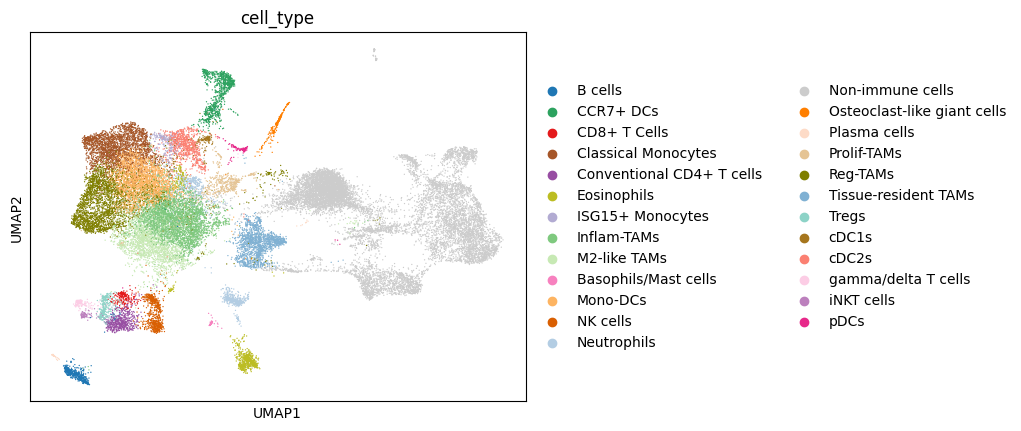

In [35]:
adata.uns["cell_type_colors"] = adata.uns["annotation_v6_colors"]
sc.pl.umap(adata, color="cell_type")

In [36]:
keys_to_remove = [key for key in adata.uns.keys() if key.startswith("leiden") or key.startswith("annotation")]

for key in keys_to_remove:
    del adata.uns[key]

In [81]:
adata.obs.rename(
    columns={
        "cell_type": "annotation_fine"
    },
    inplace=True
)

adata.obs["annotation_fine"].value_counts(dropna=False)

annotation_fine
Non-immune cells               11771
Inflam-TAMs                     3374
Reg-TAMs                        2744
Mono-DCs                        2508
Classical Monocytes             2284
M2-like TAMs                    2058
Tissue-resident TAMs            1674
CCR7+ DCs                        946
cDC2s                            862
Neutrophils                      827
Eosinophils                      771
NK cells                         670
Conventional CD4+ T cells        540
Prolif-TAMs                      532
B cells                          486
Tregs                            316
Osteoclast-like giant cells      246
CD8+ T Cells                     220
ISG15+ Monocytes                 214
cDC1s                            171
gamma/delta T cells              151
pDCs                             115
iNKT cells                        98
Basophils/Mast cells              48
Plasma cells                      47
Name: count, dtype: int64

In [83]:
ontology_dict = {
    "CL:0000057": "fibroblast",
    "CL:0000000": "cell",
    "CL:0000576": "monocyte",
    "CL:0000235": "macrophage",
    "CL:0000623": "natural killer cell",
    "CL:0011031": "monocyte-derived dendritic cell",
    "CL:0000990": "conventional dendritic cell",
    "CL:0000451": "dendritic cell",
    "CL:0000236": "B cell",
    "CL:0000775": "neutrophil",
    "CL:0000624": "CD4-positive, alpha-beta T cell",
    "CL:0000815": "regulatory T cell",
    "CL:0000625": "CD8-positive, alpha-beta T cell",
    "CL:0000784": "plasmacytoid dendritic cell",
    "CL:0001064": "malignant cell",
    "CL:0000092": "osteoclast",
    "CL:0000097": "mast cell",
    "CL:0000767": "basophil",
    "CL:0000786": "plasma cell",
    "CL:0000798": "gamma-delta T cell",
    "CL:0000921": "type I NK T cell",
    "CL:0000771": "eosinophil"
}

adata.obs["cell_type__ontology_label"] = adata.obs["cell_type_ontology_term_id"].map(ontology_dict)
adata.obs["cell_type__ontology_label"].value_counts(dropna=False)

cell_type__ontology_label
cell                               11771
macrophage                         10382
monocyte-derived dendritic cell     2508
monocyte                            2498
conventional dendritic cell         1033
dendritic cell                       946
neutrophil                           827
eosinophil                           771
natural killer cell                  670
CD4-positive, alpha-beta T cell      540
B cell                               486
regulatory T cell                    316
osteoclast                           246
CD8-positive, alpha-beta T cell      220
gamma-delta T cell                   151
plasmacytoid dendritic cell          115
type I NK T cell                      98
mast cell                             48
plasma cell                           47
Name: count, dtype: int64

In [84]:
adata.obs["species__ontology_label"] = "Mus musculus"
adata.obs["disease__ontology_label"] = "cutaneous melanoma"
adata.obs["organ__ontology_label"] = "dermis"
adata.obs["library_preparation_protocol__ontology_label"] = "10x 5' transcription profiling"
adata.obs["sex"] = "female"

In [85]:
adata.obs.rename(
    columns={
        "sample_id": "biosample_id",
        "organism_ontology_term_id": "species",
        "disease_ontology_term_id": "disease",
        "tissue_ontology_term_id": "organ",
        "assay_ontology_term_id": "library_preparation_protocol",
        "cell_type_ontology_term_id": "cell_type"
    },
    inplace=True
)

In [ ]:
for col in ["biosample_id", "species", "disease", "organ", "library_preparation_protocol", "cell_type"]:
    print(col)
    adata.obs[col] = adata.obs[col].str.replace(":", "_")
    print(adata.obs[col].value_counts(dropna=False))
    print("-----------------------")

biosample_id
biosample_id
S5     6844
S8     4669
S13    4044
S4     3976
S2     3654
S7     3648
S9     3633
S10    3205
Name: count, dtype: int64
-----------------------
species
species
NCBITaxon_10090    33673
Name: count, dtype: int64
-----------------------
disease
disease
MONDO_0005012    33673
Name: count, dtype: int64
-----------------------
organ
organ
UBERON_0002067    33673
Name: count, dtype: int64
-----------------------
library_preparation_protocol
library_preparation_protocol
EFO_0030004    33673
Name: count, dtype: int64
-----------------------
cell_type
cell_type
CL_0000000    11771
CL_0000235    10382
CL_0011031     2508
CL_0000576     2498
CL_0000990     1033
CL_0000451      946
CL_0000775      827
CL_0000771      771
CL_0000623      670
CL_0000624      540
CL_0000236      486
CL_0000815      316
CL_0000092      246
CL_0000625      220
CL_0000798      151
CL_0000784      115
CL_0000921       98
CL_0000097       48
CL_0000786       47
Name: count, dtype: int64
-------

In [88]:
norm_counts = adata.X.copy()

adata.X = adata.raw.X
del adata.raw

adata.var.index = adata.var["gene_symbols"]
adata.var.index.name = None
adata.var.rename(columns={"gene_symbols": "feature_name"}, inplace=True)
adata.var.index = adata.var.index.astype(str)
adata.var_names_make_unique()

adata.raw = adata.copy()
adata.X = norm_counts

In [96]:
del adata.uns["DC_fine_colors"]
del adata.uns["myeloid_fine_colors"]

In [ ]:
annot_cols = [x for x in adata.obs.columns if "annotation" in x]
adata.obs["cell_type_final"] = adata.obs["annotation_v6"]
adata.uns["cell_type_final_colors"] = adata.uns["cell_type_colors"]
adata.obs.drop(columns=["annotation_v1_subannot", "annotation_DC_fine",
                        "myeloid_fine", "DC_fine", "annotation_T_NK_fine"]+annot_cols,
               inplace=True
)
adata

AnnData object with n_obs × n_vars = 33673 × 23676
    obs: 'library_id', 'biosample_id', 'genotype', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_counts', 'log1p_n_counts', 'log1p_n_genes', 'percent_hb', 'n_counts_hb', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_top50', 'cell_passed_qc', 'consensus_fraction', 'qc_cluster', 'cluster_passed_qc', 'consensus_passed_qc', 'cell_passed_qc_int', 'cluster_passed_qc_int', 'consensus_passed_qc_int', 'cell_type', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease', 'library_preparation_protocol', 'species', 'donor_id', 'sex_ontology_term_id', 'organ', 'tissue_type', 'suspension_type', 'cell_type__ontology_label', 'species__ontology_label', 'disease__ontology_label', 'organ__ontology_label', 'library_preparation_protocol__ontology_label', 'sex', 'cell_type_final'
    var: 'ensembl_ids', 'feature_name', 'n_cells', 'hb', 'mito', 'ribo', 'n_counts', 'highly_variable', 'mean

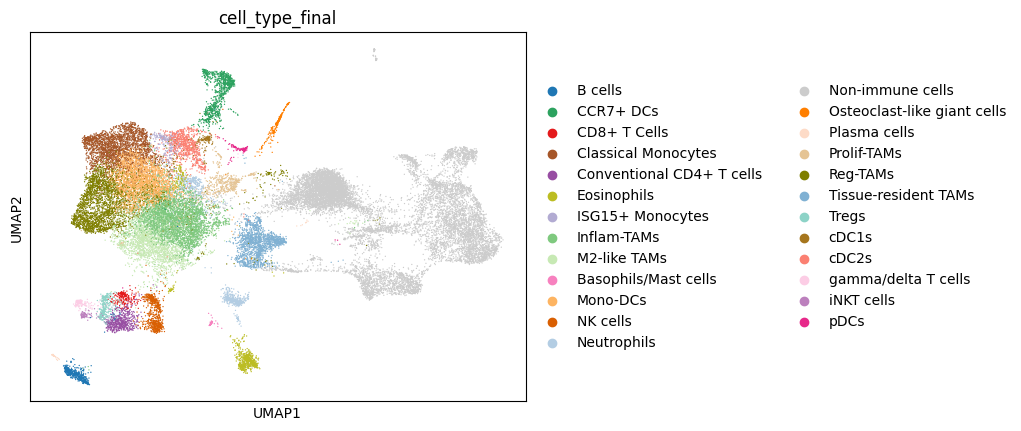

In [100]:
sc.pl.umap(adata, color="cell_type_final")

In [101]:
adata.write_h5ad("/home/icb/raphael.kfuri-rubens/data/yumm_analysis/anndata_files/immunity_dc_rev_final_v6_scportal.h5ad", compression="gzip")